In [1]:
from collections import Counter
import collections, functools, operator 
import matplotlib.pyplot as plt
import math

In [2]:
#read file to list of lists
#0: orthography
#1: phon w/o r dipthong char
#2: freq 1
#3: freq 2
#4: phon w/ r dipthong char
r1 = []
myFile= open( "CMUDict_Lemma_RDip_SubtlexFreqs.txt", "rU" )
for aRow in myFile:
    r1.append(aRow.strip('\n').split('\t'))
myFile.close()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 'U' mode is deprecated
  


In [3]:
#get the number of each character in each word, multiplied by the frequency for that word
list_of_dict = []
for ii in range(0, len(r1)):
    local_dict = dict(Counter(r1[ii][4]))
    #multiply by freq
    for key in local_dict:
        local_dict[key] *= float(r1[ii][3])
    list_of_dict.append(local_dict)

In [4]:
#sum everything together to get the counts for each character in the corpus based on word frequency
result = dict(functools.reduce(operator.add, 
         map(collections.Counter, list_of_dict))) 

In [5]:
result

{'V': 119506.7499999998,
 '1': 7006.159999999999,
 'd': 92287.69999999946,
 'v': 47775.19000000008,
 'k': 83011.31999999985,
 'x': 137029.76999999932,
 'b': 46949.41000000016,
 '@': 64742.68000000016,
 's': 103715.0799999998,
 'l': 95266.42999999964,
 'o': 48567.89999999999,
 'n': 159292.17999999868,
 'i': 125308.13999999959,
 'm': 85657.68999999951,
 't': 200927.39999999927,
 'e': 48000.4300000002,
 'r': 65940.67000000055,
 'S': 16165.580000000022,
 'a': 28349.920000000217,
 'R': 52551.8400000003,
 'E': 69197.87000000007,
 'h': 53371.61000000006,
 '5': 17470.71000000001,
 'c': 31298.45000000007,
 'Y': 94751.53999999951,
 'N': 32789.66000000019,
 'I': 75978.25999999985,
 'J': 12088.33000000004,
 'z': 18860.460000000105,
 'W': 21245.82000000008,
 'Z': 658.5999999999999,
 'p': 41997.65000000028,
 'T': 20156.68000000003,
 'u': 69249.07000000011,
 'C': 8857.730000000018,
 'y': 64016.17000000003,
 'w': 45582.50999999999,
 '4': 9721.859999999997,
 'f': 49269.11000000007,
 'O': 1996.189999999

In [6]:
#do the same thing for type frequency (don't multiply by the freq of each word)
#get the number of each character in each word, multiplied by the frequency for that word
list_of_dict2 = []
for ii in range(0, len(r1)):
    local_dict = dict(Counter(r1[ii][4]))
    list_of_dict2.append(local_dict)
result_type = dict(functools.reduce(operator.add, 
         map(collections.Counter, list_of_dict2))) 

In [7]:
result_type

{'V': 2609,
 '1': 785,
 'd': 7738,
 'v': 2370,
 'k': 8563,
 'x': 23185,
 'b': 3846,
 '@': 4384,
 's': 10525,
 'l': 10271,
 'o': 2520,
 'n': 12092,
 'i': 6627,
 'm': 5656,
 't': 12402,
 'e': 3539,
 'r': 7274,
 'S': 2351,
 'a': 2587,
 'R': 5599,
 'E': 4884,
 'h': 1305,
 '5': 932,
 'c': 1217,
 'Y': 2725,
 'N': 3002,
 'I': 4210,
 'J': 1476,
 'z': 1749,
 'W': 752,
 'Z': 158,
 'p': 5582,
 'T': 635,
 'u': 1899,
 'C': 1030,
 'y': 1086,
 'w': 1461,
 '4': 214,
 'f': 3193,
 'O': 263,
 '2': 139,
 'U': 405,
 'g': 2104,
 'D': 178,
 '6': 61,
 'H': 103}

<BarContainer object of 46 artists>

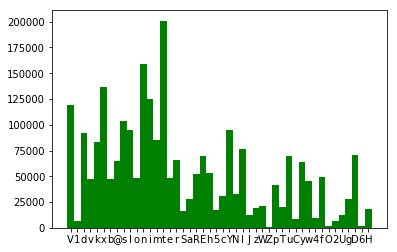

In [8]:
#plot of token count segments
width = 1.0
plt.bar(result.keys(), result.values(), width, color='g')

<BarContainer object of 46 artists>

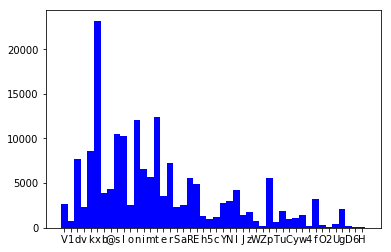

In [9]:
#plot type count segments
width = 1.0
plt.bar(result_type.keys(), result_type.values(), width, color='b')

In [10]:
#just the monopthongy vowels
vowels = { 'i', 'I', 'e', 'E', '@', 'u', 'U', 'o', 'c', 'a', 'V', 'R' }
vowels_token = { key:value for key,value in result.items() if key in vowels}
vowels_type = { key:value for key,value in result_type.items() if key in vowels}


<BarContainer object of 12 artists>

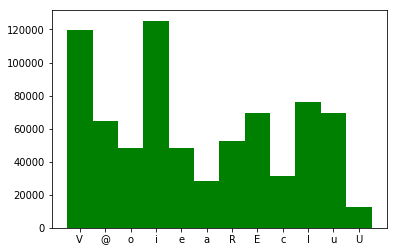

In [11]:
#plot token freq vowels
width = 1.0
plt.bar(vowels_token.keys(), vowels_token.values(), width, color='g')

<BarContainer object of 12 artists>

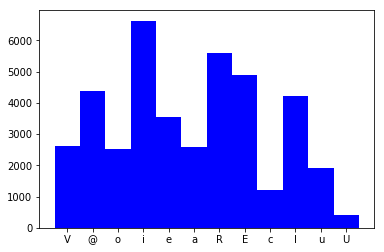

In [12]:
#plot type freq vowels
width = 1.0
plt.bar(vowels_type.keys(), vowels_type.values(), width, color='b')

In [13]:
#entropy of vowel system (token freq)

#first get total frequency so we can get the probability
totalfreq = sum(vowels_token.values())

#now divide the frequency of each vowel by the total frequency to get the probability
probabilities = {}
for key in vowels_token:
    probabilities[key] = vowels_token[key]/totalfreq
    
#now get the surprisal for each vowel times the probability for each vowel
surprisals = {}
for key in probabilities:
    surprisals[key] = probabilities[key]*(math.log2(1/probabilities[key]))

#now add all of those together to get the entropy
entropy_vowels_token = sum(surprisals.values())

In [14]:
probabilities

{'V': 0.16028146302986224,
 '@': 0.08683234604634671,
 'o': 0.06513886511254015,
 'i': 0.16806223923544714,
 'e': 0.06437777904982384,
 'a': 0.03802267783518165,
 'R': 0.07048209243504068,
 'E': 0.09280760996471114,
 'c': 0.04197722184367838,
 'I': 0.10190141285963561,
 'u': 0.09287627898053774,
 'U': 0.01724001360719468}

In [15]:
surprisals

{'V': 0.42335471586585377,
 '@': 0.30613817076607197,
 'o': 0.25666911976950213,
 'i': 0.4324127945393178,
 'e': 0.25476175905994664,
 'a': 0.17935282112358877,
 'R': 0.26970673508349335,
 'E': 0.31829419330066183,
 'c': 0.19201428607642038,
 'I': 0.3357400917343263,
 'u': 0.31843059636542326,
 'U': 0.10099364228181293}

In [16]:
entropy_vowels_token

3.3878689259664196

In [17]:
#contribution of vowels to the system (token freq)

#entropy of the entire system first
totalfreq = sum(result.values())

probabilities = {}
for key in result:
    probabilities[key] = result[key]/totalfreq
    
surprisals = {}
for key in probabilities:
    surprisals[key] = probabilities[key]*(math.log2(1/probabilities[key]))

#now add all of those together to get the entropy
entropy_total = sum(surprisals.values())

In [18]:
entropy_total

5.0571104380771805

In [19]:
#entropy of system without vowels
nonvowel = { key:value for key,value in result.items() if not key in vowels}


totalfreq = sum(nonvowel.values())

probabilities = {}
for key in nonvowel:
    probabilities[key] = nonvowel[key]/totalfreq
    
surprisals = {}
for key in probabilities:
    surprisals[key] = probabilities[key]*(math.log2(1/probabilities[key]))

#now add all of those together to get the entropy
entropy_nonvowel = sum(surprisals.values())


In [20]:
entropy_nonvowel

4.513860441153023

In [21]:
#entropy contribution of vowels

vowel_contr = entropy_total - (entropy_nonvowel/ entropy_total)

In [22]:
vowel_contr

4.164533442493654